In [91]:
import pandas as pd

In [92]:
data = pd.read_csv('tested.csv')

In [93]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [96]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [97]:
data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [98]:
data['Cabin_available'] = data['Cabin'].notnull().astype(int)
data.drop(columns=['Cabin'], inplace=True)

In [99]:
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

In [100]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [101]:
scaler = StandardScaler()
data[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(data[['Age', 'Fare', 'SibSp', 'Parch']])

In [102]:
data = pd.get_dummies(data, columns=['Pclass', 'Embarked'], drop_first=True)

In [103]:
data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_available,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,892,0,"Kelly, Mr. James",1,0.386231,-0.499470,-0.400248,330911,-0.497413,0,False,True,True,False
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",0,1.371370,0.616992,-0.400248,363272,-0.512278,0,False,True,False,True
2,894,0,"Myles, Mr. Thomas Francis",1,2.553537,-0.499470,-0.400248,240276,-0.464100,0,True,False,True,False
3,895,0,"Wirz, Mr. Albert",1,-0.204852,-0.499470,-0.400248,315154,-0.482475,0,False,True,False,True
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,-0.598908,0.616992,0.619896,3101298,-0.417492,0,False,True,False,True


In [104]:
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [105]:
x = data.drop('Survived', axis=1)
y = data['Survived']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Evaluating Logistic Regression with Cross-Validation

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [109]:
model = LogisticRegression(max_iter=1000)

In [110]:
cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

In [111]:
print('Mean Cross-Validation Accuracy:', cv_scores.mean())

Mean Cross-Validation Accuracy: 1.0


In [112]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [113]:
test_accuracy = model.score(x_test, y_test)

In [114]:
print('Test Accuracy:', test_accuracy)
print('Cross-Validation Accuracy Scores:', cv_scores)

Test Accuracy: 1.0
Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]


Analyzing Overfitting and Underfitting in Decision Trees

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
depths = range(1, 21)
train_accuracies = []
test_accuracies = []

In [117]:
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(x_train, y_train)
    
   
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print("Depth:", depth, "- Train Accuracy:", train_acc, "Test Accuracy:", test_acc)

Depth: 1 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 2 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 3 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 4 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 5 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 6 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 7 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 8 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 9 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 10 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 11 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 12 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 13 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 14 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 15 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 16 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 17 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 18 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 19 - Train Accuracy: 1.0 Test Accuracy: 1.0
Depth: 20 - Train Accuracy: 1.0 Test Acc

In [118]:
import matplotlib.pyplot as plt

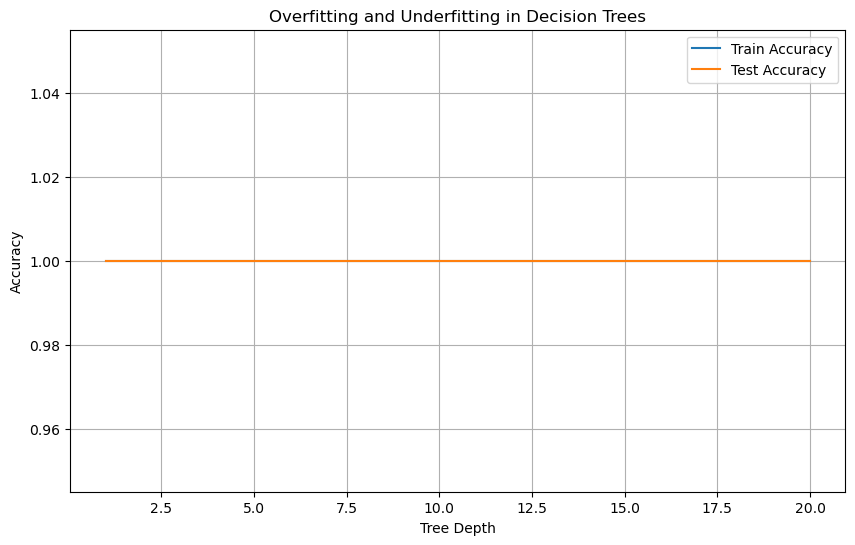

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Train Accuracy')
plt.plot(depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting and Underfitting in Decision Trees')
plt.legend()
plt.grid(True)
plt.show()

Calculating Precision, Recall, and F1-Score for Logistic Regression

In [120]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [121]:
y_pred = model.predict(x_test)

In [123]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [124]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [125]:
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


ROC Curve Analysis for Decision Trees

In [126]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [127]:
y_prob = model.predict_proba(x_test)[:, 1]

In [129]:
from sklearn.metrics import roc_curve, auc

In [130]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

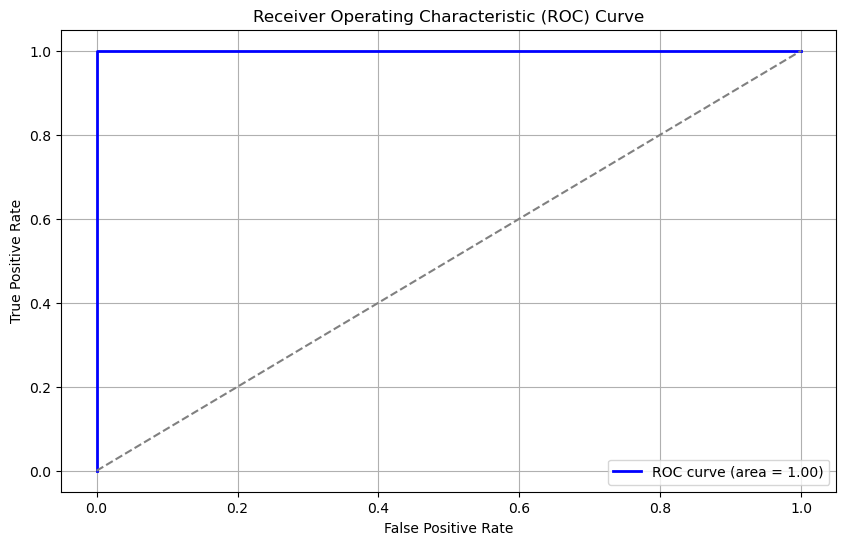

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [132]:
print("AUC (Area Under the Curve):", roc_auc)

AUC (Area Under the Curve): 1.0


Comparing Model Performance with and without Cross-Validation

In [138]:
from sklearn.metrics import accuracy_score

In [135]:
logistic = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier(random_state=42)

In [136]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall

In [139]:
logistic_results = evaluate_model(logistic_model, x_train, y_train, x_test, y_test)
tree_results = evaluate_model(decision_tree_model, x_train, y_train, x_test, y_test)

In [140]:
print("Model Performance Without Cross-Validation")
print("Logistic Regression - Accuracy: {}, Precision: {}, Recall: {}".format(*logistic_results))
print("Decision Tree - Accuracy: {}, Precision: {}, Recall: {}".format(*tree_results))

Model Performance Without Cross-Validation
Logistic Regression - Accuracy: 1.0, Precision: 1.0, Recall: 1.0
Decision Tree - Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [143]:
import numpy as np

In [144]:
def cross_val_evaluation(model, x, y, cv=5):
    accuracies = cross_val_score(model, x, y, cv=cv, scoring='accuracy')
    precisions = cross_val_score(model, x, y, cv=cv, scoring='precision')
    recalls = cross_val_score(model, x, y, cv=cv, scoring='recall')
    return np.mean(accuracies), np.mean(precisions), np.mean(recalls)

In [145]:
logistic_cv_results = cross_val_evaluation(logistic, x, y)
tree_cv_results = cross_val_evaluation(tree_model, x, y)

In [146]:
print("Model Performance With Cross-Validation")
print("Logistic Regression - Accuracy: {}, Precision: {}, Recall: {}".format(*logistic_cv_results))
print("Decision Tree - Accuracy: {}, Precision: {}, Recall: {}".format(*tree_cv_results))

Model Performance With Cross-Validation
Logistic Regression - Accuracy: 1.0, Precision: 1.0, Recall: 1.0
Decision Tree - Accuracy: 1.0, Precision: 1.0, Recall: 1.0
